In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Sentiment Analysis of Online Food Reviews using Machine Learning/Dataset/FoodReview_dataset.csv")
df.head()

,Restaurant_Name,Restaurant_Food_Type,Review,Review type_Food,Gender,Review_Customer_opinion
0,Chillox,"Burger, Fries,shakes",আমি আজ বেকনের সাথে তিনটি গরুর মাংস অর্ডার করেছ...,Burger,Female,Unsatisfied
1,Chillox,"Burger, Fries,shakes",আমি অগোছালো বার্গার পছন্দ করি না। আমরা যে বার্...,Burger,Female,Unsatisfied
2,Chillox,"Burger, Fries,shakes",আমরা একটি ৬২০ টাকা এবং একটি ৩৯০ টাকার বার্গার ...,Burger,Female,Unsatisfied
3,Chillox,"Burger, Fries,shakes",তাদের নাগা ড্রামস্টিক খেয়ে আমি প্রায় মারা গি...,Naga Drumsticks,Female,Unsatisfied
4,Chillox,"Burger, Fries,shakes","আমি চিলোক্স পছন্দ করতাম, কিন্তু আজ আমার অভিজ্ঞ...",Brioche Bun,Male,Unsatisfied


Lable Encoder

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 5:].values
x
y

array([['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Satisfied '],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Satisfied '],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Satisfied '],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Satisfied '],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Unsatisfied'],
       ['Satisfied '],
       ['Satisfied '],
       ['Satisfied '],

In [ ]:
#lable inEcoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
x[:,0]=LE.fit_transform(x[:,0])

In [ ]:
y=LE.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
df

,Restaurant_Name,Restaurant_Food_Type,Review,Review type_Food,Gender,Review_Customer_opinion
0,7,"Burger, Fries,shakes",আমি আজ বেকনের সাথে তিনটি গরুর মাংস অর্ডার করেছ...,Burger,Female,Unsatisfied
1,7,"Burger, Fries,shakes",আমি অগোছালো বার্গার পছন্দ করি না। আমরা যে বার্...,Burger,Female,Unsatisfied
2,7,"Burger, Fries,shakes",আমরা একটি ৬২০ টাকা এবং একটি ৩৯০ টাকার বার্গার ...,Burger,Female,Unsatisfied
3,7,"Burger, Fries,shakes",তাদের নাগা ড্রামস্টিক খেয়ে আমি প্রায় মারা গি...,Naga Drumsticks,Female,Unsatisfied
4,7,"Burger, Fries,shakes","আমি চিলোক্স পছন্দ করতাম, কিন্তু আজ আমার অভিজ্ঞ...",Brioche Bun,Male,Unsatisfied
...,...,...,...,...,...,...
491,13,Turkish resturent,কাবাব ভালো না পাশাপাশি বুফের মানেও সীমিত ভিন্ন...,Kabab,Male,Unsatisfied
492,13,Turkish resturent,তুর্কি খাবার খাওয়ার জন্য এটি একটি ভালো রেস্তো...,kabab,Female,Satisfied
493,13,Turkish resturent,"মেহমেত গণৌশ কাবাব ছিল, যা 2-এর জন্য একটি মিশ্র...",Kebab,Female,Satisfied
494,13,Turkish resturent,যদিও একটু দামি কিন্তু বিশেষ করে কাবাবগুলো ছিল ...,Kebab,Male,Satisfied


In [ ]:
for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()

discrete_features = df.dtypes == str

In [ ]:
df.shape

(496, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Restaurant_Name          496 non-null    int64
 1   Restaurant_Food_Type     496 non-null    int64
 2   Review                   496 non-null    int64
 3   Review type_Food         496 non-null    int64
 4   Gender                   496 non-null    int64
 5   Review_Customer_opinion  496 non-null    int64
dtypes: int64(6)
memory usage: 23.4 KB


In [ ]:
df.describe

<bound method NDFrame.describe of      Restaurant_Name  Restaurant_Food_Type  Review  Review type_Food  Gender  \
0                  0                     0       0                 0       0   
1                  0                     0       1                 0       0   
2                  0                     0       2                 0       0   
3                  0                     0       3                 1       0   
4                  0                     0       4                 2       1   
..               ...                   ...     ...               ...     ...   
491               35                    32     488               134       1   
492               35                    32     489                59       0   
493               35                    32     490                10       0   
494               35                    32     491                10       1   
495               35                    32     492                98       0   

     

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_Name,496.0,15.766129,9.153337,0.0,12.00,15.0,18.00,35.0
Restaurant_Food_Type,496.0,16.086694,8.558447,0.0,13.75,16.0,20.00,32.0
Review,496.0,245.276210,142.790538,0.0,121.75,245.5,368.25,492.0
Review type_Food,496.0,113.856855,98.053859,0.0,20.00,91.5,206.25,305.0
Gender,496.0,0.598790,0.494739,0.0,0.00,1.0,1.00,2.0
Review_Customer_opinion,496.0,0.758065,0.428688,0.0,1.00,1.0,1.00,1.0


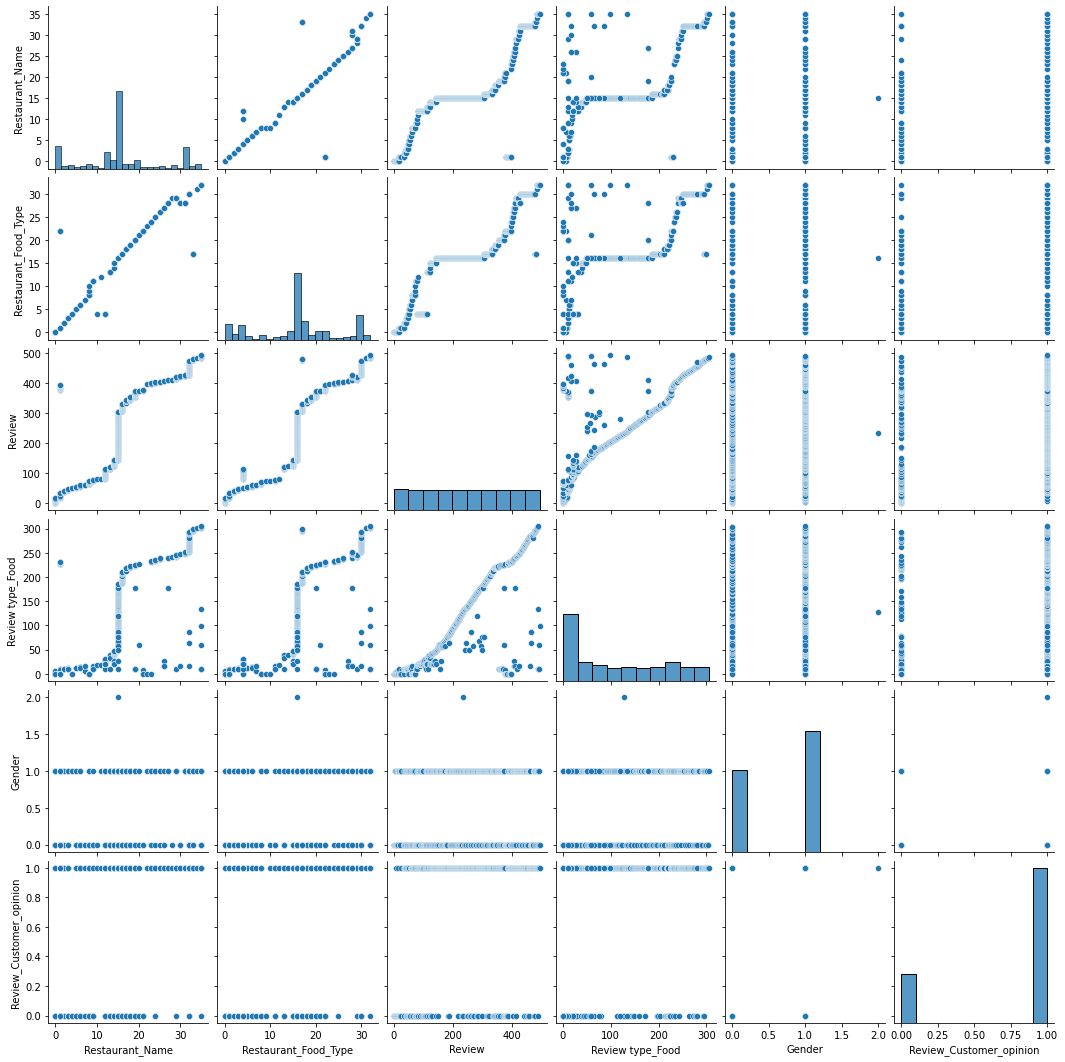

In [ ]:
sns.pairplot(df)

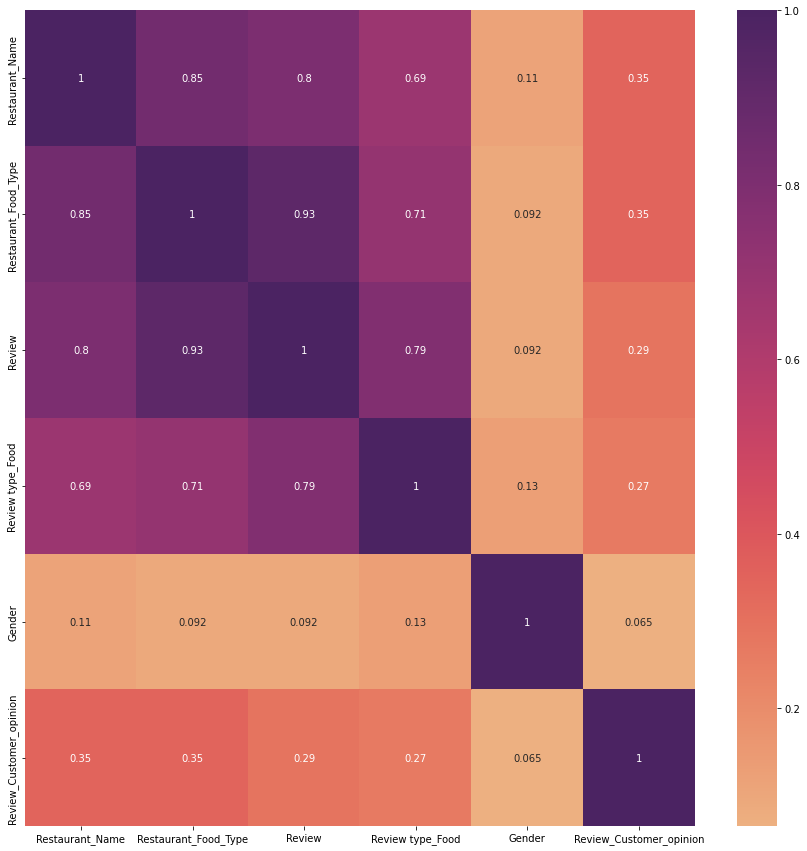

In [ ]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True,ax=ax, cmap='flare')
plt.show()

In [ ]:
df.isnull()

,Restaurant_Name,Restaurant_Food_Type,Review,Review type_Food,Gender,Review_Customer_opinion
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
491,False,False,False,False,False,False
492,False,False,False,False,False,False
493,False,False,False,False,False,False
494,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Restaurant_Name            0
Restaurant_Food_Type       0
Review                     0
Review type_Food           0
Gender                     0
Review_Customer_opinion    0
dtype: int64

In [ ]:
pd.set_option('Display.float','{:.2f}'.format)
df.describe()

,Restaurant_Name,Restaurant_Food_Type,Review,Review type_Food,Gender,Review_Customer_opinion
count,496.00,496.00,496.00,496.00,496.00,496.00
mean,15.77,16.09,245.28,113.86,0.60,0.76
std,9.15,8.56,142.79,98.05,0.49,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,12.00,13.75,121.75,20.00,0.00,1.00
50%,15.00,16.00,245.50,91.50,1.00,1.00
75%,18.00,20.00,368.25,206.25,1.00,1.00
max,35.00,32.00,492.00,305.00,2.00,1.00


In [ ]:
df.Review_Customer_opinion.value_counts()

1    376
0    120
Name: Review_Customer_opinion, dtype: int64

In [ ]:
df.tail()

,Restaurant_Name,Restaurant_Food_Type,Review,Review type_Food,Gender,Review_Customer_opinion
491,35,32,488,134,1,0
492,35,32,489,59,0,1
493,35,32,490,10,0,1
494,35,32,491,10,1,1
495,35,32,492,98,0,1


In [ ]:
print(df.columns)
print(df.columns)

Index(['Restaurant_Name', 'Restaurant_Food_Type', 'Review', 'Review type_Food',
       'Gender', 'Review_Customer_opinion'],
      dtype='object')
Index(['Restaurant_Name', 'Restaurant_Food_Type', 'Review', 'Review type_Food',
       'Gender', 'Review_Customer_opinion'],
      dtype='object')


In [ ]:
X = df.drop('Review_Customer_opinion', axis=1)
y = df['Review_Customer_opinion']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kfold = model_selection.KFold(n_splits = 3)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
#confusion_matrix(y_test, y_pred)
# Plotting the confusion Matrix
        cm = confusion_matrix(y_test, pred, labels=model.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
        disp.plot()
        plt.show()

        '''ax = sns.heatmap(disp, annot=True, cmp='Blues')
        ax.set_title('Seaborn Confusion Matrix with labels\n\n');
        ax.set_xlabel('\nPredicted Values');
        ax.set_ylabel('Actual Values ');

        ## Display the visualization of the Confusion Matrix.*/
        plt.show()'''


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# **Logistic Regression**

Train Result:
Accuracy Score: 81.06%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.73   0.82      0.81       0.78          0.80
recall     0.32   0.96      0.81       0.64          0.81
f1-score   0.44   0.89      0.81       0.67          0.78
support   94.00 302.00      0.81     396.00        396.00
_______________________________________________
Confusion Matrix: 
 [[ 30  64]
 [ 11 291]]

Test Result:
Accuracy Score: 82.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.90  0.81      0.82       0.86          0.83
recall     0.35  0.99      0.82       0.67          0.82
f1-score   0.50  0.89      0.82       0.70          0.79
support   26.00 74.00      0.82     100.00        100.00
_______________________________________________
Confusion Matrix: 
 [[ 9 17]
 [ 1 73]]



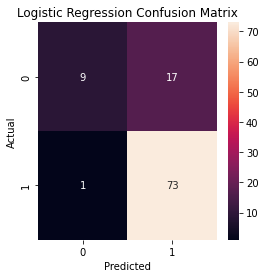

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
confusion_lr_clf=confusion_matrix(y_test,lr_clf.predict(X_test))
plt.figure(figsize=(4,4))
sns.heatmap(confusion_lr_clf,annot=True)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

# **K-nearest neighbors**

Train Result:
Accuracy Score: 85.86%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.83   0.86      0.86       0.85          0.86
recall     0.51   0.97      0.86       0.74          0.86
f1-score   0.63   0.91      0.86       0.77          0.85
support   94.00 302.00      0.86     396.00        396.00
_______________________________________________
Confusion Matrix: 
 [[ 48  46]
 [ 10 292]]

Test Result:
Accuracy Score: 80.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.69  0.82      0.80       0.75          0.79
recall     0.42  0.93      0.80       0.68          0.80
f1-score   0.52  0.87      0.80       0.70          0.78
support   26.00 74.00      0.80     100.00        100.00
_______________________________________________
Confusion Matrix: 
 [[11 15]
 [ 5 69]]



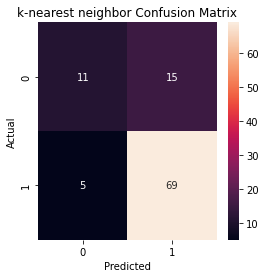

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn_clf.predict(X_test))
plt.figure(figsize=(4,4))
sns.heatmap(confusion_knn,annot=True)
plt.title("k-nearest neighbor Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

# **Support Vector machine**

Train Result:
Accuracy Score: 90.91%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.95   0.90      0.91       0.93          0.91
recall     0.65   0.99      0.91       0.82          0.91
f1-score   0.77   0.94      0.91       0.86          0.90
support   94.00 302.00      0.91     396.00        396.00
_______________________________________________
Confusion Matrix: 
 [[ 61  33]
 [  3 299]]

Test Result:
Accuracy Score: 80.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.80  0.80      0.80       0.80          0.80
recall     0.31  0.97      0.80       0.64          0.80
f1-score   0.44  0.88      0.80       0.66          0.77
support   26.00 74.00      0.80     100.00        100.00
_______________________________________________
Confusion Matrix: 
 [[ 8 18]
 [ 2 72]]



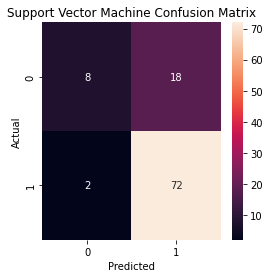

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
confusion_svm_clf=confusion_matrix(y_test,svm_clf.predict(X_test))
plt.figure(figsize=(4,4))
sns.heatmap(confusion_svm_clf,annot=True)
plt.title("Support Vector Machine Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

# **Decision Tree Classifier**

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  1.00   1.00      1.00       1.00          1.00
recall     1.00   1.00      1.00       1.00          1.00
f1-score   1.00   1.00      1.00       1.00          1.00
support   94.00 302.00      1.00     396.00        396.00
_______________________________________________
Confusion Matrix: 
 [[ 94   0]
 [  0 302]]

Test Result:
Accuracy Score: 78.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.60  0.82      0.78       0.71          0.77
recall     0.46  0.89      0.78       0.68          0.78
f1-score   0.52  0.86      0.78       0.69          0.77
support   26.00 74.00      0.78     100.00        100.00
_______________________________________________
Confusion Matrix: 
 [[12 14]
 [ 8 66]]



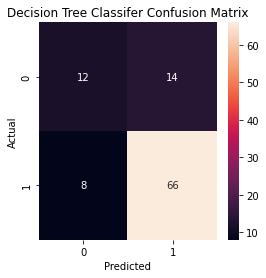

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
confusion_tree_clf=confusion_matrix(y_test,tree_clf.predict(X_test))
plt.figure(figsize=(4,4))
sns.heatmap(confusion_tree_clf,annot=True)
plt.title("Decision Tree Classifer Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

# **Random Forest**

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  1.00   1.00      1.00       1.00          1.00
recall     1.00   1.00      1.00       1.00          1.00
f1-score   1.00   1.00      1.00       1.00          1.00
support   94.00 302.00      1.00     396.00        396.00
_______________________________________________
Confusion Matrix: 
 [[ 94   0]
 [  0 302]]

Test Result:
Accuracy Score: 79.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.67  0.81      0.79       0.74          0.77
recall     0.38  0.93      0.79       0.66          0.79
f1-score   0.49  0.87      0.79       0.68          0.77
support   26.00 74.00      0.79     100.00        100.00
_______________________________________________
Confusion Matrix: 
 [[10 16]
 [ 5 69]]



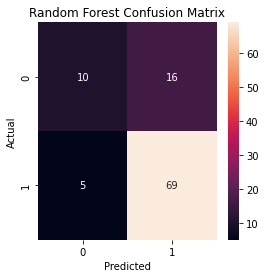

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
confusion_rf_clf=confusion_matrix(y_test,rf_clf.predict(X_test))
plt.figure(figsize=(4,4))
sns.heatmap(confusion_rf_clf,annot=True)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

# **XGBoost Classifer**

Train Result:
Accuracy Score: 87.37%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.89   0.87      0.87       0.88          0.88
recall     0.53   0.98      0.87       0.76          0.87
f1-score   0.67   0.92      0.87       0.79          0.86
support   94.00 302.00      0.87     396.00        396.00
_______________________________________________
Confusion Matrix: 
 [[ 50  44]
 [  6 296]]

Test Result:
Accuracy Score: 83.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.85  0.83      0.83       0.84          0.83
recall     0.42  0.97      0.83       0.70          0.83
f1-score   0.56  0.89      0.83       0.73          0.81
support   26.00 74.00      0.83     100.00        100.00
_______________________________________________
Confusion Matrix: 
 [[11 15]
 [ 2 72]]



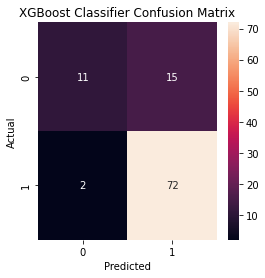

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
confusion_xgb_clf=confusion_matrix(y_test,xgb_clf.predict(X_test))
plt.figure(figsize=(4,4))
sns.heatmap(confusion_xgb_clf,annot=True)
plt.title("XGBoost Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
review = ["দারুণ ভারতীয় খাবার। সুস্বাদু বাটার চিকেন, নান ও রাইতা খাবার খুব ভালো লেগেছে।",
"এটা যে ভালো বা খারাপ না. পরিবেশ দেখতে সুন্দর কিন্তু খাবার নয়। তারা দ্রুত খাবারের থালাগুলো ভরে ফেলল কিন্তু খাবারের স্বাদ তেমন ভালো হলো না।",
"সাজনা একটি চমৎকার খাবারের রেস্টুরেন্ট। সেখানে নিয়মিত বুফে লঞ্চ এবং ডিনার অফার করে। তাদের পানীয় চার্জ বুফে মূল্য সঙ্গে যোগ করা হবে. তারা ক্যাটারিং পরিষেবাও সরবরাহ করে। তাদের সার্ভিস ভালো। ভেতরের পরিবেশ সুন্দর। তাদের খাবারের স্বাদ ভালো।",
"সেখানে গিয়েছিলেন ইফতার সামগ্রী কিনতে। একটু দামি হলেও স্বাদ বেশ ভালোই ছিল। বিশেষ করে হালিম ও দহি ভারা।",
"পনির মসলা দোসা, পেঁয়াজ উথাপ্পাম এবং গুলাব জামুন ভাল। ঢাকায় একটু দামি কিন্তু স্বাদের কদর।",
"ভারতীয় রেস্তোরাঁ, সাধারণ এবং বুফে লাঞ্চ এখানে দেওয়া হয়। মাটন কারি খুব ভালো ছিল।",
"মাটন কারি খুব সুস্বাদু ছিল না।",
"ফ্রেঞ্চ ফ্রাই বিডিতে আমার স্বাদ সবচেয়ে খারাপ। অন্যান্য খাবার সুস্বাদু। বাচ্চাদের জন্য ভাল নয়।",
"আমাদের দোসার লালসা মেটাতে এই জায়গায় গিয়েছিলাম! খাস্তা দোসা এবং তাজা চাটনি দ্বারা বোল্ড করা হয়েছিল। আমরাও আচারি গরুর মাংস ও নানের অর্ডার দিয়েছি। খাবারটি দুর্দান্ত ছিল। শীঘ্রই এই জায়গায় ফিরে যেতে চাই।",
"এটি ঢাকায় কিছু খাঁটি উত্তর এবং দক্ষিণ ভারতীয় খাবারের অফার করে। তাদের স্টার্টারগুলি চমৎকার, বিশেষ করে মিনি ডোসা। মাটন, চিকেন, সবজি- সব আইটেমই সুস্বাদু।",
"ভালো পরিবেশ ছিল না। দোসা ছিল খাস্তা, কিছুটা সুস্বাদু কিন্তু প্রচুর তেল দিয়ে।",
"খাবারটা বেশ ভালো ছিল। বিশেষ করে হায়দ্রাবাদী মসলা দোসা। কিছুটা খরচের ব্যাপার।",
"চমৎকার খাদ্য. কর্মীরা খুব সহযোগিতামূলক এবং নরম। বিভিন্ন খাবার চেষ্টা করে দেখুন। আপনি যদি পছন্দ করেন, ডাল কোলহাপুরি অবশ্যই চেষ্টা করুন। সামগ্রিকভাবে খুব ভাল অভিজ্ঞতা।",
"এটি অত্যন্ত সুস্বাদু খাবার পরিবেশন করে বিশেষ করে বিরিয়ানি, সুগন্ধি শীতল বাতাস সহ দুর্দান্ত পরিবেশ এবং কর্মীরা খুবই বন্ধুত্বপূর্ণ। সবকিছুই অসাধারণ।",
"একটি সুন্দর লাঞ্চ বুফে চাই, এটি সঠিক জায়গা। যুক্তিসঙ্গত হার, ভাল স্প্রেড এবং পরিষেবা, আমি মনে করি তাদের ডোসা শহরে সেরা।",
"এটি এই শহরে দীর্ঘকাল ধরে খাঁটি দক্ষিণ ভারতীয় দোসা এবং আরও অনেক মুখের জল খাওয়ানো খাবার পরিবেশন করছে।",
"হালিম অসাধারণ ছিল।",
"আমি তাদের খাবারের মান উপভোগ করেছি, বিশেষ করে তাদের কাচ্চি আমার কাছে খুব মুখরোচক ছিল।",
"সুন্দর পরিবেশ ও সুস্বাদু কাবাব।",
"খুব ভালো ভারতীয় রেস্টুরেন্ট। খাবারটি খুব সুস্বাদু ছিল, বিশেষ করে মাটন বিরিয়ানি।",
"বনানীতে একটি ভাল রেস্তোরাঁ, যুক্তিসঙ্গত দামে। তারা ঢাকায় সেরা দক্ষিণ ভারতীয় খাবার (ডোসা) তৈরি করে।",
"ভাল মানের ভাল. আপনি লাঞ্চের সময় মাটন এবং বুফে পরিষেবা পাবেন।",
"মোগলাই খাবার এখানকার বিশেষত্ব। কিন্তু তারা চমৎকার দক্ষিণ ভারতীয় দোসা এবং ভাদা পরিবেশন করেছে।",
"একটু ধীর ছিল। কিন্তু খাবারগুলো ছিল দারুণ। কুলফি অসাধারণ।",
"ভালো ভারতীয় খাবার। তাদের দোসা আশ্চর্যজনক।",
"গুলাব জামুনের স্বাদ ছিল অসাধারন। অত্যন্ত বাঞ্ছনীয়।",
"বুফে লাঞ্চ/ডিনারের জন্য অন্যতম সেরা জায়গা।",
"আমার খাওয়া সবচেয়ে বাজে ফালুদা।",
"মাটন রোগান জোশ দুর্দান্ত ছিল।"]

In [ ]:
review = np.array([review])
review

array([['দারুণ ভারতীয় খাবার। সুস্বাদু বাটার চিকেন, নান ও রাইতা খাবার খুব ভালো লেগেছে।',
        'এটা যে ভালো বা খারাপ না. পরিবেশ দেখতে সুন্দর কিন্তু খাবার নয়। তারা দ্রুত খাবারের থালাগুলো ভরে ফেলল কিন্তু খাবারের স্বাদ তেমন ভালো হলো না।',
        'সাজনা একটি চমৎকার খাবারের রেস্টুরেন্ট। সেখানে নিয়মিত বুফে লঞ্চ এবং ডিনার অফার করে। তাদের পানীয় চার্জ বুফে মূল্য সঙ্গে যোগ করা হবে. তারা ক্যাটারিং পরিষেবাও সরবরাহ করে। তাদের সার্ভিস ভালো। ভেতরের পরিবেশ সুন্দর। তাদের খাবারের স্বাদ ভালো।',
        'সেখানে গিয়েছিলেন ইফতার সামগ্রী কিনতে। একটু দামি হলেও স্বাদ বেশ ভালোই ছিল। বিশেষ করে হালিম ও দহি ভারা।',
        'পনির মসলা দোসা, পেঁয়াজ উথাপ্পাম এবং গুলাব জামুন ভাল। ঢাকায় একটু দামি কিন্তু স্বাদের কদর।',
        'ভারতীয় রেস্তোরাঁ, সাধারণ এবং বুফে লাঞ্চ এখানে দেওয়া হয়। মাটন কারি খুব ভালো ছিল।',
        'মাটন কারি খুব সুস্বাদু ছিল না।',
        'ফ্রেঞ্চ ফ্রাই বিডিতে আমার স্বাদ সবচেয়ে খারাপ। অন্যান্য খাবার সুস্বাদু। বাচ্চাদের জন্য ভাল নয়।',
        'আমাদের দোসার লালসা মেটাতে এই জায়গায় গিয়েছি

In [ ]:
lr_clf.predict(review)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


ValueError: ignored

In [ ]:
df.Review_Customer_opinion

0      0
1      0
2      0
3      0
4      0
      ..
491    0
492    1
493    1
494    1
495    1
Name: Review_Customer_opinion, Length: 496, dtype: int64

In [ ]:
pred = lr_clf.predict(Review_Customer_opinion)

NameError: ignored